In [58]:
# %matplotlib inline
import pandas as pd
import sklearn
import numpy as np
from IPython.display import display
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [83]:
plt.rcParams['font.family']='TH SarabunPSK' #you can change to other font that works for you
plt.rcParams.update({'font.size': 50})

In [60]:
import seaborn as sns
sns.set(style="darkgrid")

In [61]:
# input_nation = pd.read_csv('./Nation/nation_news_nocon_1.csv')
# input_nation = input_nation.append(pd.read_csv('./Nation/nation_news_nocon_11.csv'),ignore_index=True)
# input_nation = input_nation.append(pd.read_csv('./Nation/nation_news_nocon_2.csv'),ignore_index=True)
# input_nation = input_nation.append(pd.read_csv('./Nation/nation_news_nocon_3.csv'),ignore_index=True)
# input_nation = input_nation.append(pd.read_csv('./Nation/nation_news_nocon_4.csv'),ignore_index=True)
# input_nation = input_nation.append(pd.read_csv('./Nation/nation_news_nocon_5.csv'),ignore_index=True)
# input_nation = input_nation.append(pd.read_csv('./Nation/nation_news_nocon_6.csv'),ignore_index=True)
# input_nation = input_nation.append(pd.read_csv('./Nation/nation_news_nocon_7.csv'),ignore_index=True)
# input_nation = input_nation.append(pd.read_csv('./Nation/nation_news_nocon_8.csv'),ignore_index=True)

input_nation = pd.read_csv('..//nation_news.csv')


In [62]:
input_nation.drop('Unnamed: 0', axis=1, inplace=True)
input_nation.drop('Unnamed: 0.1', axis=1, inplace=True)
input_nation.drop_duplicates(inplace=True)

In [63]:
input_nation.loc[input_nation['view'] == '-', 'view'] = '0'
input_nation.loc[input_nation['share'] == '-', 'share'] = '0'

In [64]:
input_nation['view'] = input_nation['view'].apply(lambda x: int(''.join(x.split(','))))
input_nation['share'] = input_nation['share'].apply(lambda x: int(''.join(x.split(','))))

In [65]:
input_nation.head()

,headline,date,DOW,time,view,like,share,comment,category,tag,content
0,ไทยส่งทีมเยาวชนลุยศึกเชียร์ลีดดิ้งโลกที่สหรัฐฯ,05/04/2562,FRI,12:15,494,NaN,86,NaN,กีฬา,NaN,ที่ศูนย์วิทยาศาสตร์การกีฬา การกีฬาแห่งประเทศไท...
1,"""บิ๊กโจ๊ก"" จ่อเรียก ""ปิยบุตร"" ให้ข้อมูล ปมถูกร้อง",05/04/2562,FRI,12:16,1250,NaN,797,NaN,อาชญากรรม,NaN,เมื่อเวลา 11.30 น. วันที่ 5 เมษายน ที่ สำนักงา...
2,"""ศศิน"" ชี้ ""เปรมชัย"" ต้องติดคุก จึงจะเหมาะสม",05/04/2562,FRI,12:06,755,NaN,354,NaN,คุณภาพชีวิต,NaN,ประธานมูลนิธิสืบนาคะเสถียร นายศศิน เฉลิมลาภ บอ...
3,จิตอาสาปรับปรุงภูมิทัศน์รอบ แหล่งน้ำศักดิ์สิทธิ์,05/04/2562,FRI,12:02,232,NaN,4,NaN,ภูมิภาค,NaN,นายทรงพล สวาสดิ์ธรรม ผู้ว่าราชการจังหวัดลำปาง ...
4,คุณภาพน้ำ สงกรานต์คูเมืองเชียงใหม่ เกณฑ์พอใช้,05/04/2562,FRI,12:04,298,NaN,36,NaN,คุณภาพชีวิต,NaN,นายโสภณ ทองดี ผู้ตรวจราชการกระทรวงทรัพยากรธรรม...


In [66]:
print("number of news : ", len(input_nation))
print("number of category : ", len(input_nation.category.unique()))
print("max view : ", input_nation.view.max())
print("min view : ", input_nation.view.min())
print("max share : ", input_nation.share.max())
print("min share : ", input_nation.share.min())
# print("number of news : ", len(input_nation))

number of news :  11794
number of category :  20
max view :  252017
min view :  0
max share :  143860
min share :  0


In [67]:
input_nation.sort_values(by=['view'], ascending=False)[:20]

,headline,date,DOW,time,view,like,share,comment,category,tag,content
7187,กฟน. ประกาศงดจ่ายกระแสไฟฟ้าชั่วคราว 23 - 27 ก....,21/02/2562,THU,15:13,252017,NaN,18603,NaN,เศรษฐกิจ,NaN,การไฟฟ้านครหลวง มีความจำเป็นต้องทำงานเกี่ยวกับ...
4785,"คำต่อคำ ""ธนาธร""ประกาศ เอา’ทักษิณ’กลับบ้าน",09/03/2562,SAT,08:40,198827,NaN,143860,NaN,การเมือง,NaN,"""ในจุดนี้ เราเชื่อว่า ถ้าคุณต้องการให้ประชาชนใ..."
5903,โปรดเกล้าฯ ปลด-ถอดยศข้าราชการในพระองค์ฝ่ายทหาร...,01/03/2562,FRI,21:59,170439,NaN,28114,NaN,คุณภาพชีวิต,NaN,สมเด็จพระเจ้าอยู่หัวมหาวชิราลงกรณ บดินทรเทพยวร...
2820,"ผู้บริหารเนชั่นโต้ ""ธนาธร"" กล่าวหาเนชั่นทีวี",20/03/2562,WED,15:40,141005,NaN,50332,NaN,คุณภาพชีวิต,NaN,รายการข่าวข้นคนเนชั่น เมื่อคืนวันอังคารที่ 19 ...
9583,นายกฯ เตรียมออกคำสั่ง คสช.ส่งทหารตรวจโรงงานคุม...,30/01/2562,WED,13:51,131498,NaN,128286,NaN,คุณภาพชีวิต,NaN,30 ม.ค. 62 - นายกรัฐมนตรี พล.อ.ประยุทธ์ จันทร์...
4500,ปส.รวบอดีตนางแบบ ผลิตยาลดอ้วนผสมสารเสพติด100ล้าน,11/03/2562,MON,10:38,121035,NaN,26064,NaN,อาชญากรรม,NaN,เมื่อเวลา 06.00 น. วันที่ 11 มี.ค.2562 พ.ต.อ.พ...
5125,ศาลฯ ตัดสิน ยุบ! #พรรคไทยรักษาชาติ,07/03/2562,THU,15:30,115874,NaN,73418,NaN,การเมือง,NaN,คดีนี้ย้อนกลับไปเมื่อวันที่ 8 กุมภาพันธ์ เวลา ...
6465,"นร.หญิงชี้ตัวยืนยัน ""เอกไฝ"" บุกสนามสอบหอมแก้ม",26/02/2562,TUE,15:09,115203,NaN,97407,NaN,อาชญากรรม,NaN,ซึ่งเจ้าตัวอยู่ในอาการซึมและใบหน้าเศร้า และเมื...
1690,เพื่อไทยตั้งรัฐบาลล่ม!! มาไม่ถึง 251,27/03/2562,WED,11:30,112372,NaN,35078,NaN,การเมือง,NaN,"โดยมีแกนนำ อาทิ คุณหญิงสุดารัตน์ เกยุราพันธุ์,..."
4040,"เปิดเอกสารใบสมัคร ""วันทิพย์ หิรัญธนาอังกูร"" พบ...",13/03/2562,WED,15:27,103784,NaN,10926,NaN,การเมือง,NaN,วันที่ 13 มี.ค. 62 ผู้สื่อข่าวรายงานว่า จากกรณ...


In [68]:
input_nation.sort_values(by=['view'], ascending=True)[:20]

,headline,date,DOW,time,view,like,share,comment,category,tag,content
8369,เนชั่นทันข่าว วันที่ 27-12-61 ช่วงที่ 3,10/01/2562,THU,20:51,0,NaN,0,NaN,การเมือง,NaN,NaN
11057,เนชั่นทันข่าว วันที่ 8-1-62 ช่วงที่ 4,20/01/2562,SUN,17:08,0,NaN,0,NaN,การเมือง,NaN,NaN
11058,เนชั่นทันข่าว วันที่ 8-1-62 ช่วงที่ 3,20/01/2562,SUN,17:07,0,NaN,0,NaN,การเมือง,NaN,NaN
11059,เนชั่นทันข่าว วันที่ 8-1-62 ช่วงที่ 2,20/01/2562,SUN,17:05,0,NaN,0,NaN,การเมือง,NaN,NaN
8075,"""เบนซ์-มิค""แฮปปี้เลี้ยงลูก 2 ด้วยตัวเอง",12/01/2562,SAT,15:50,0,NaN,0,NaN,บันเทิง,NaN,กลายเป็นครอบครัวสายสตรองไปแล้วสำหรับพ่อมิค บรม...
11062,เนชั่นทันข่าว วันที่ 7-1-62 ช่วงที่ 5,20/01/2562,SUN,16:59,0,NaN,0,NaN,การเมือง,NaN,NaN
8074,"ชื่นมื่น ""ยุ้ย-ธัญญ์""ควงคู่เข้าประตูวิวาห์แบบ...",12/01/2562,SAT,15:52,0,NaN,0,NaN,บันเทิง,NaN,คบหาดูใจกันมานานกว่า 11 ปีแล้ว สำหรับคู่ของยุ้...
11063,เนชั่นทันข่าว วันที่ 7-1-62 ช่วงที่ 4,20/01/2562,SUN,16:57,0,NaN,0,NaN,การเมือง,NaN,NaN
11064,เนชั่นทันข่าว วันที่ 7-1-62 ช่วงที่ 3,20/01/2562,SUN,16:55,0,NaN,0,NaN,การเมือง,NaN,NaN
8083,"""แทค ภรัญญู""เปิดใจแต่งเงียบ""เบลล์ อดิราภ์""เคลี...",13/01/2562,SUN,15:01,0,NaN,0,NaN,บันเทิง,NaN,หลังจากเป็นข่าวฮือฮาเมื่อช่วงต้นสัปดาห์ที่ผ่าน...


/home/burin/.env/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


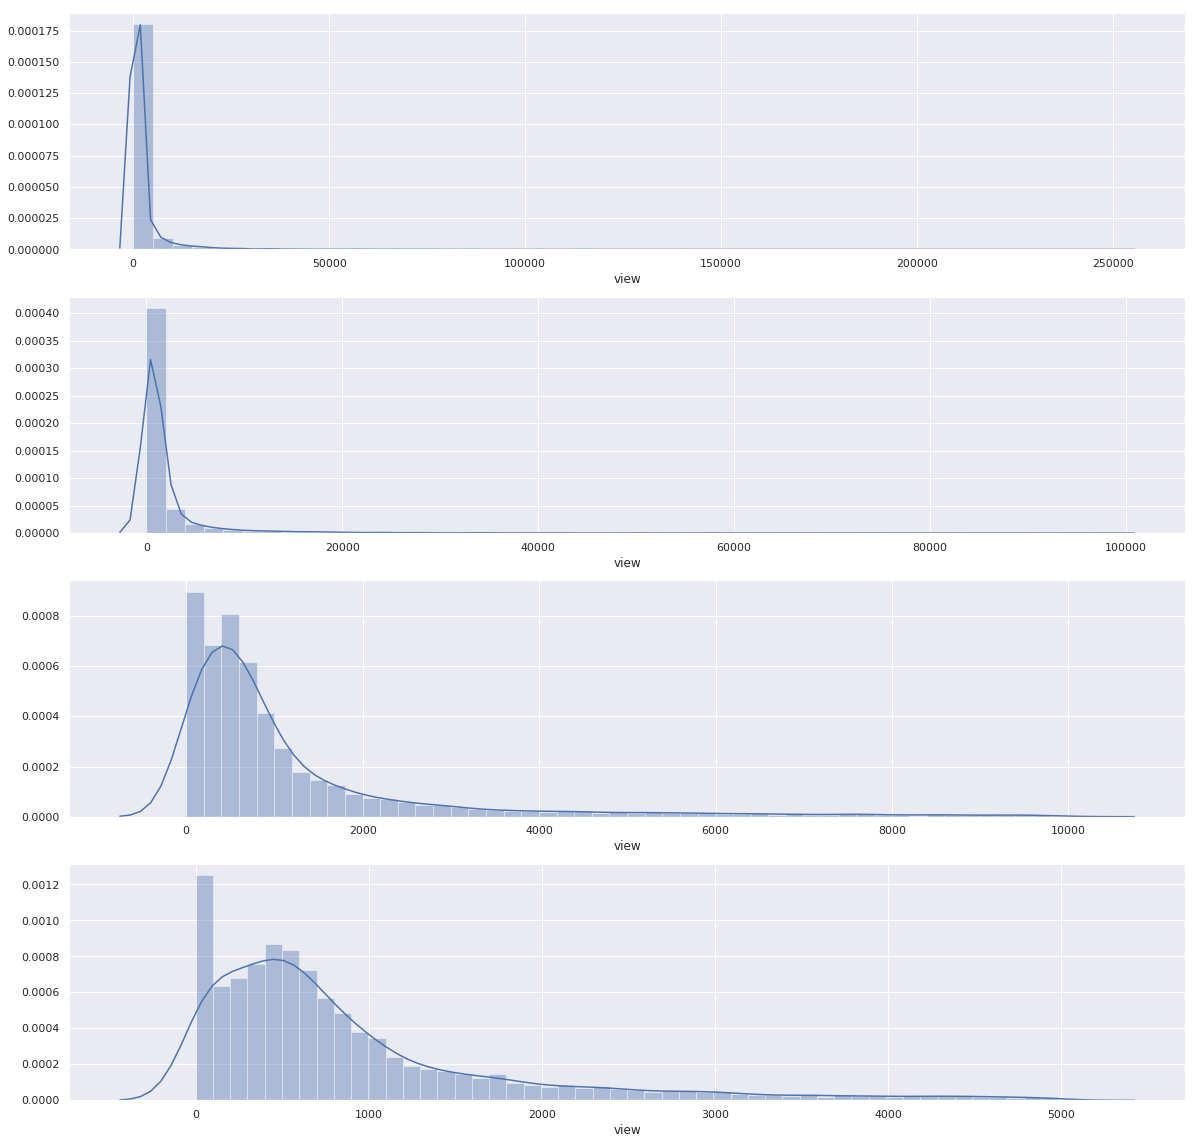

In [70]:
f, axarr = plt.subplots(4, figsize=(20,20))
sns.distplot(input_nation['view'],ax=axarr[0])
sns.distplot(input_nation[input_nation['view']<100000]['view'],ax=axarr[1])
sns.distplot(input_nation[input_nation['view']<10000]['view'],ax=axarr[2])
sns.distplot(input_nation[input_nation['view']<5000]['view'],ax=axarr[3])

In [71]:
input_nation['hour'] = input_nation['time'].str.split(':', expand = True)[0]

In [82]:
input_nation['numTag'] = input_nation['tag'].apply( lambda x : len(str(x).split(',')))

In [72]:
IQRval = input_nation['view'].describe().loc['75%']-input_nation['view'].describe().loc['25%']

In [75]:
outlierMin = max(input_nation['view'].describe().loc['25%'],0)
outlierMax = input_nation['view'].describe().loc['75%']+1.5*IQRval
print(outlierMin,outlierMax)

324.0 3231.5


In [76]:
input_nation_cut = input_nation[(input_nation['view']<=outlierMax) & (input_nation['view']>=outlierMin)]

## Plot graph to see their relations

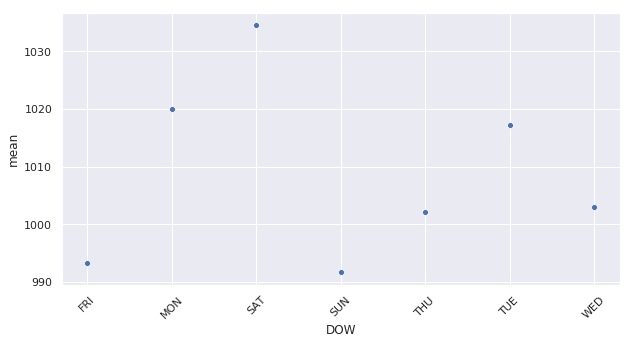

In [77]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.scatterplot(x="DOW", y="mean", data=pd.DataFrame(input_nation_cut.groupby(['DOW'])['view'].describe()).reset_index())

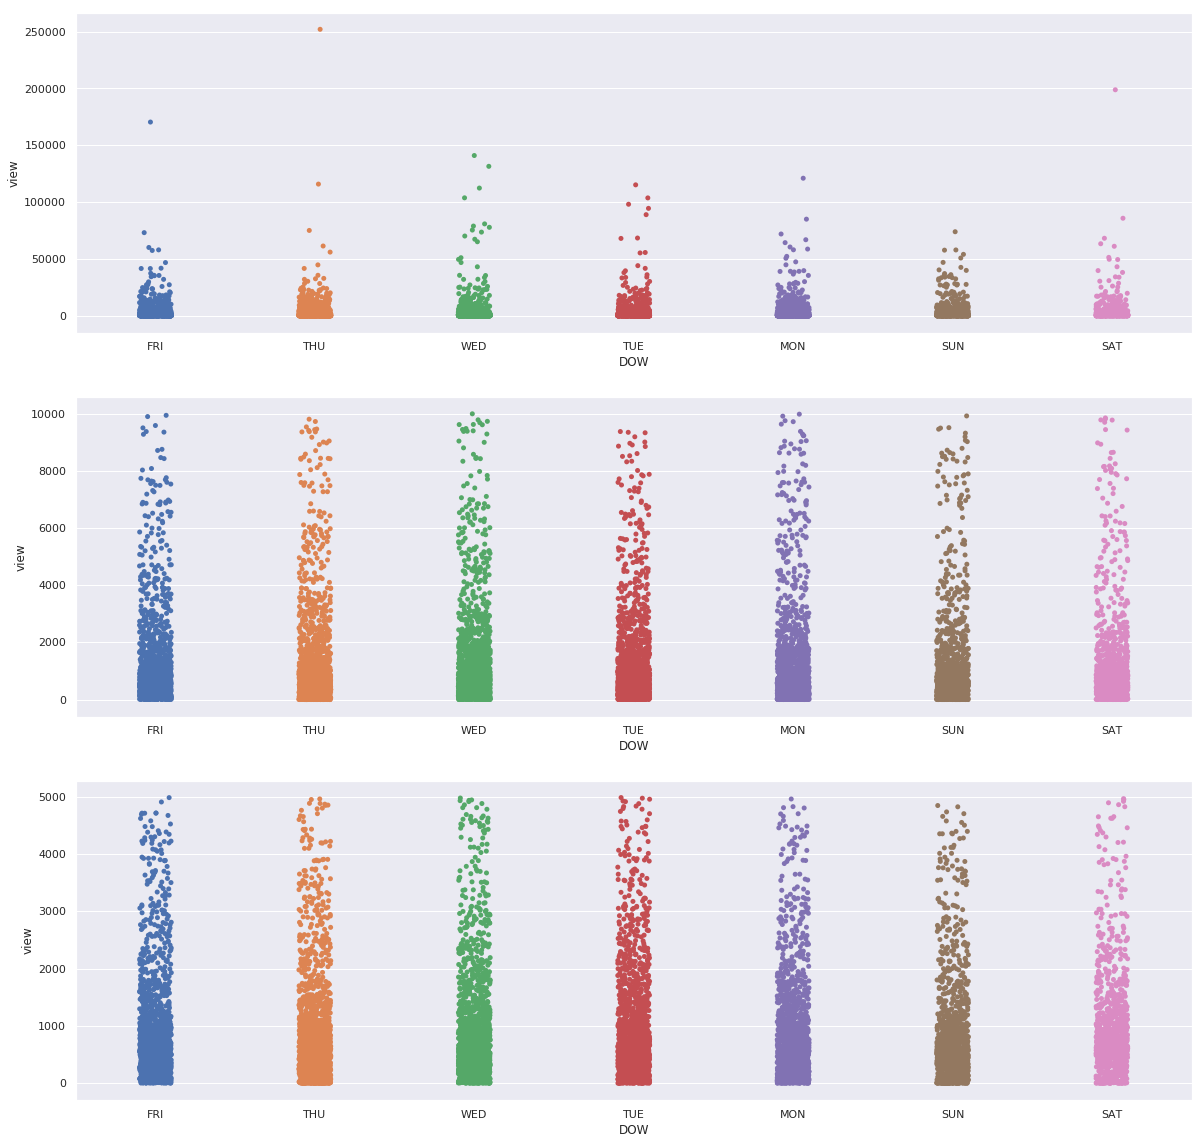

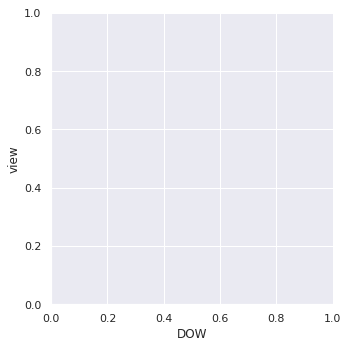

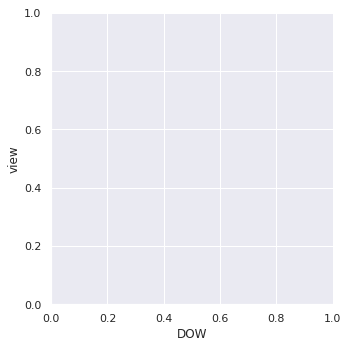

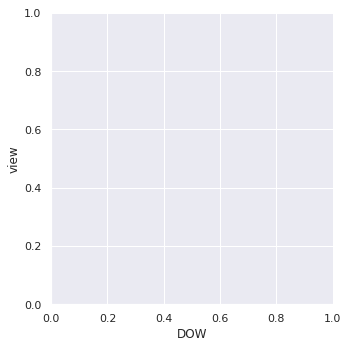

In [78]:
# plt.figure(figsize=(40,20))
fig , ax = plt.subplots(3,figsize=(20,20))
sns.catplot( ax=ax[0], x="DOW", y="view", data=input_nation )
sns.catplot( ax=ax[1], x="DOW", y="view", data=input_nation[input_nation['view']<10000])
sns.catplot( ax=ax[2], x="DOW", y="view", data=input_nation[input_nation['view']<5000])

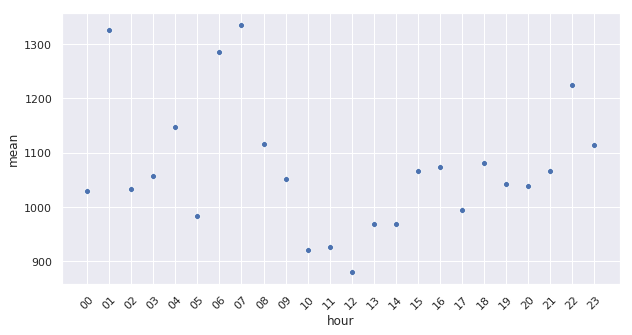

In [79]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.scatterplot(x="hour", y="mean", data=pd.DataFrame(input_nation_cut.groupby(['hour'])['view'].describe()).reset_index())

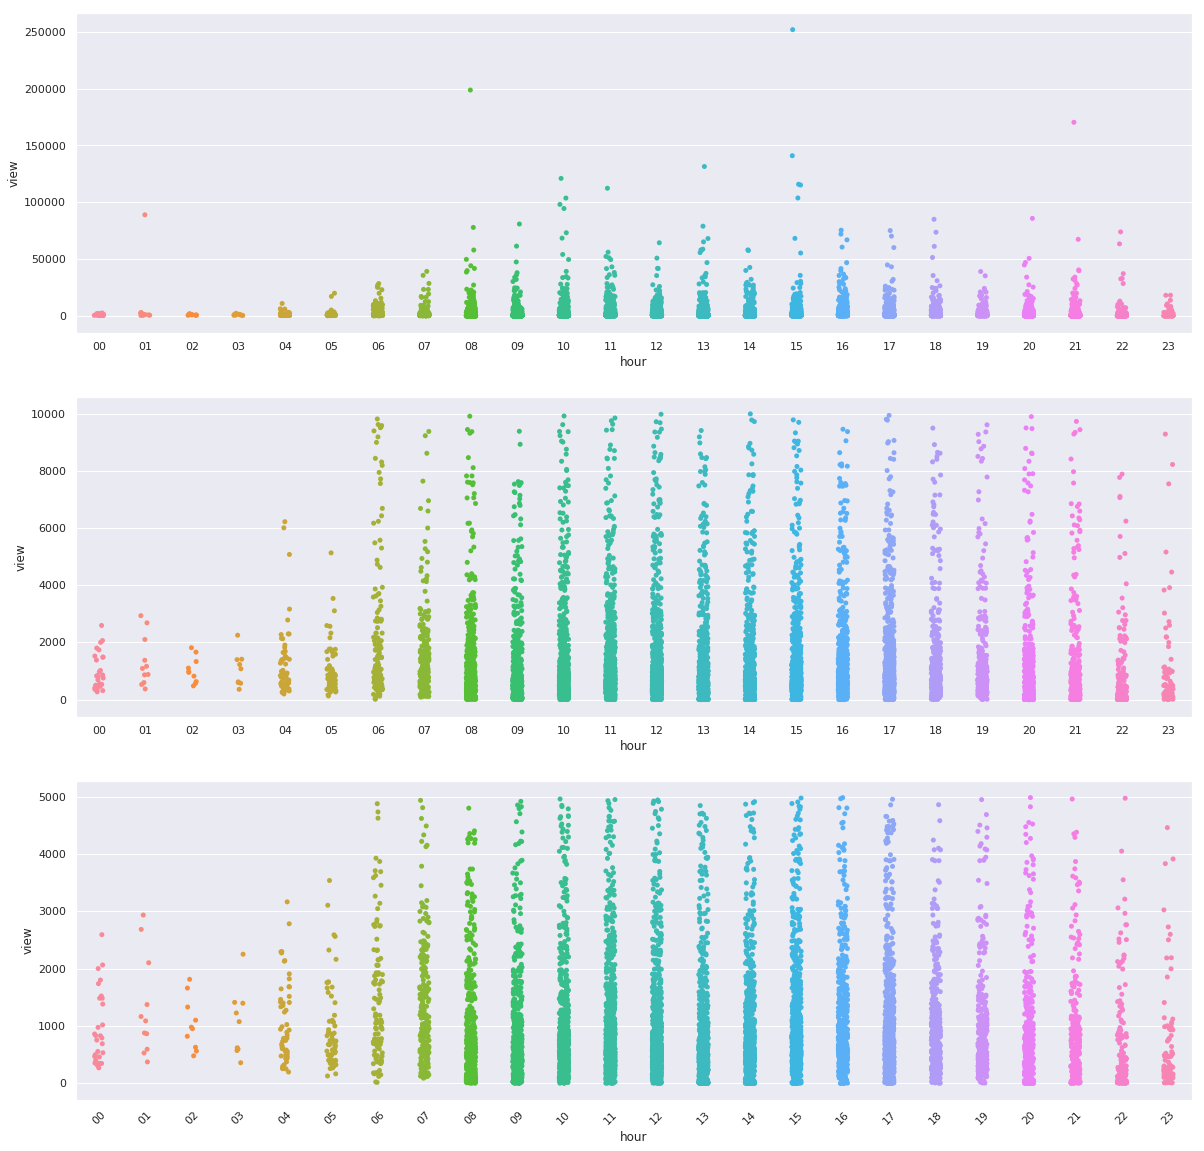

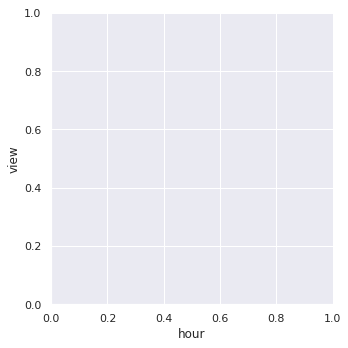

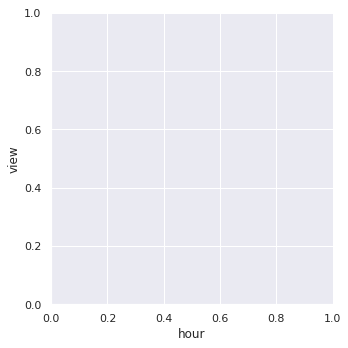

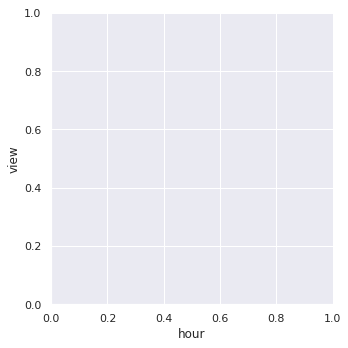

In [81]:
# plt.figure(figsize=(40,20))
fig , ax = plt.subplots(3,1,figsize=(20,20))
plt.xticks(rotation=45)
# sns.catplot( ax =ax[0],x="hour", y="view", data=input_nation )
sns.catplot( ax=ax[0], x="hour", y="view", data=input_nation)
sns.catplot( ax=ax[1], x="hour", y="view", data=input_nation[input_nation['view']<10000])
sns.catplot( ax=ax[2], x="hour", y="view", data=input_nation[input_nation['view']<5000])

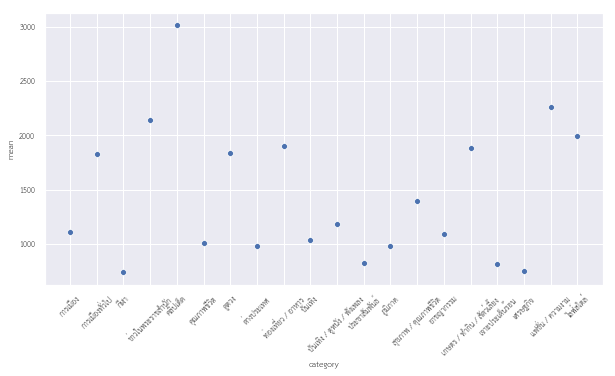

In [84]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.scatterplot(x="category", y="mean", data=pd.DataFrame(input_nation_cut.groupby(['category'])['view'].describe()).reset_index())

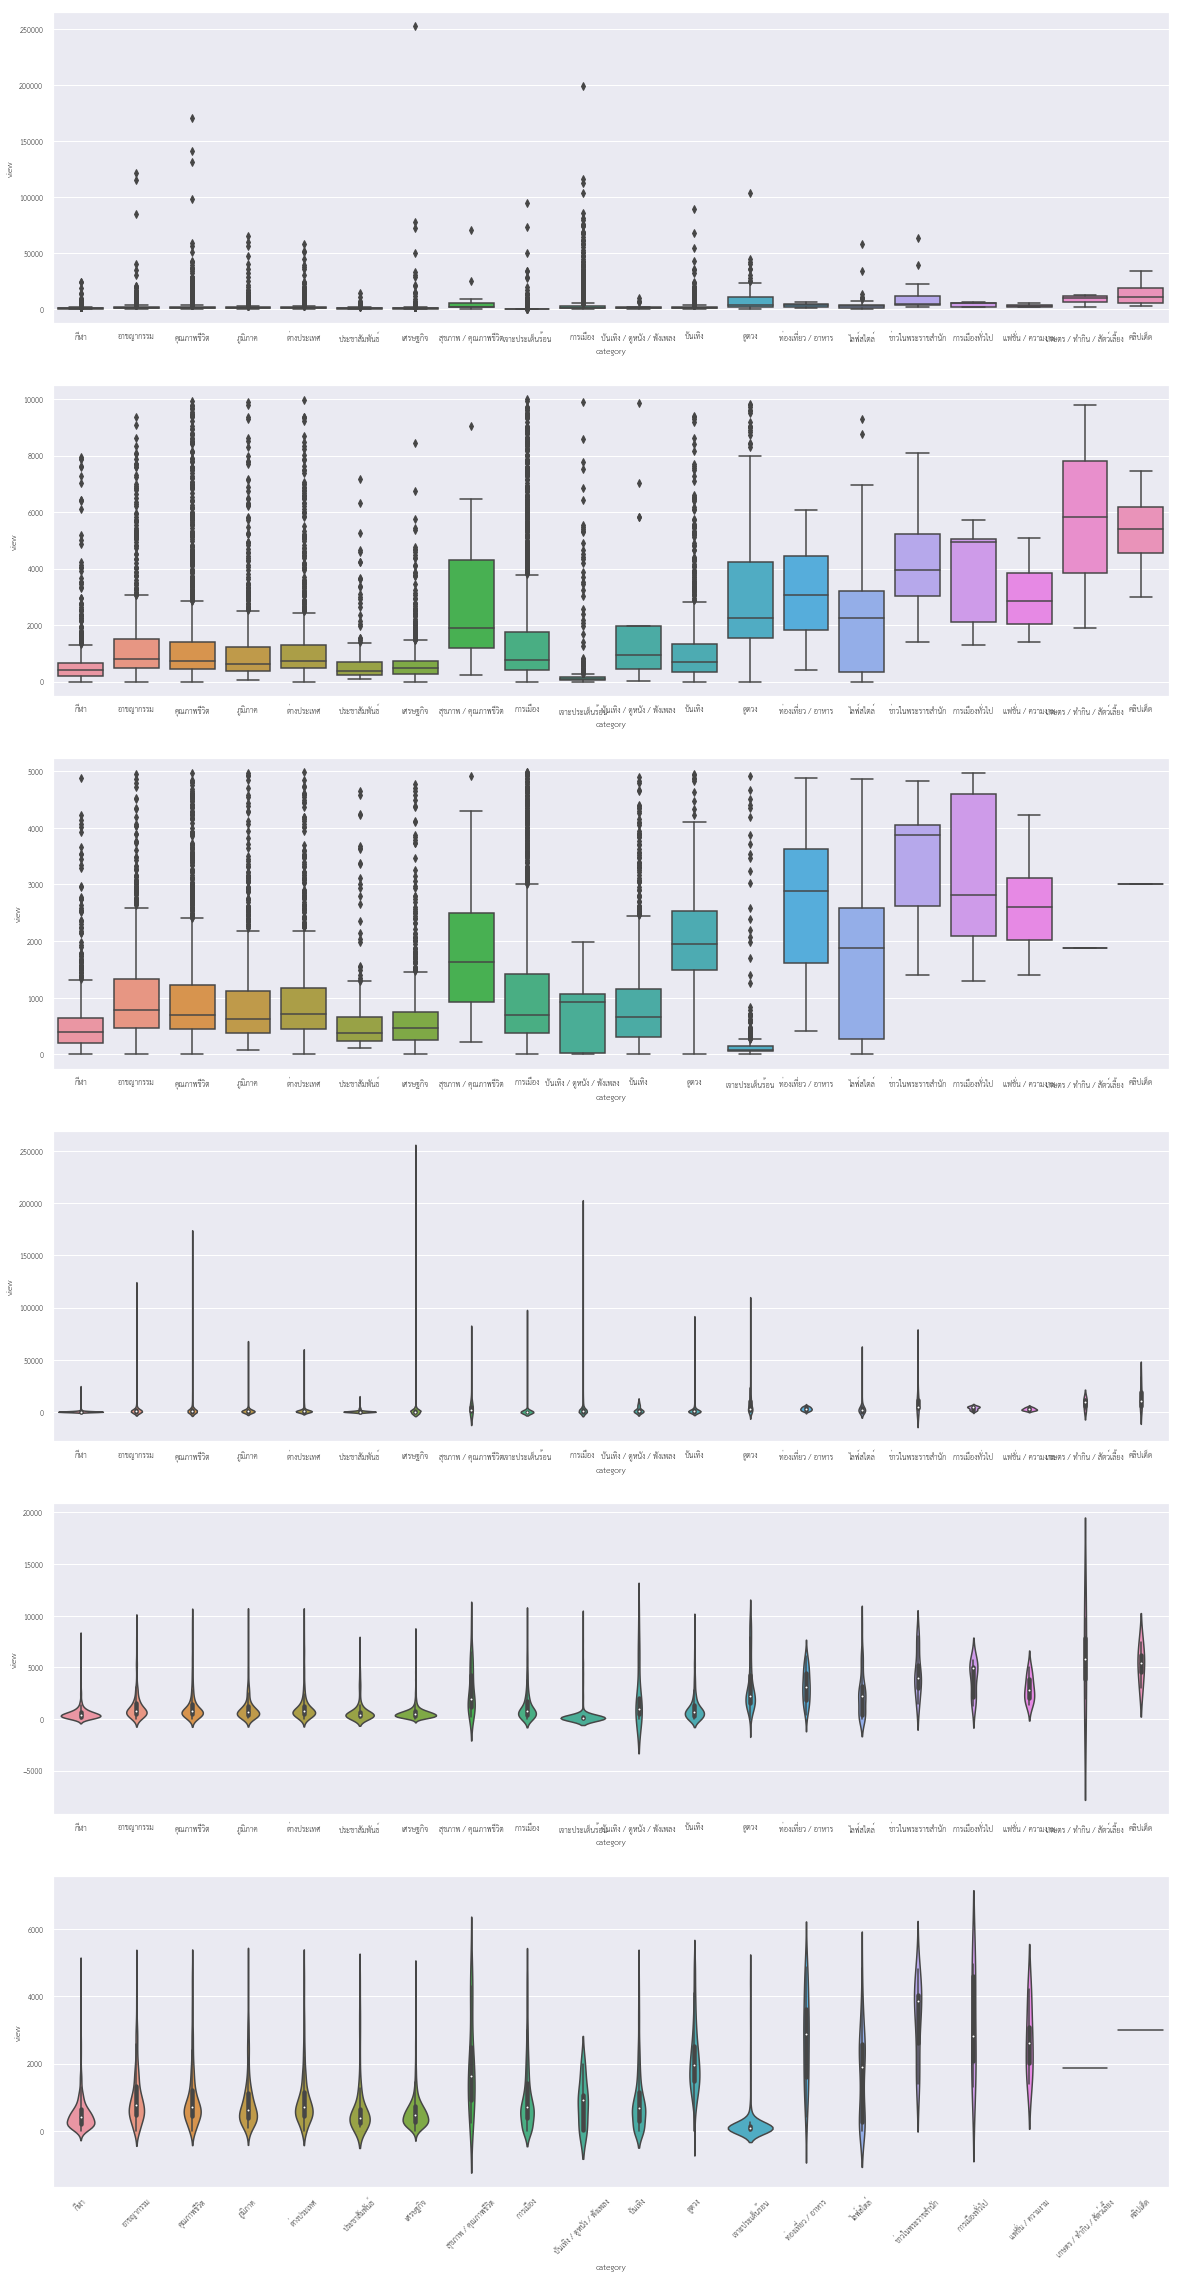

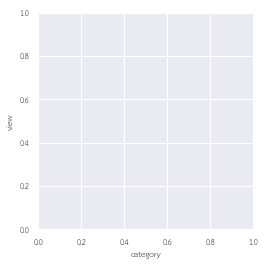

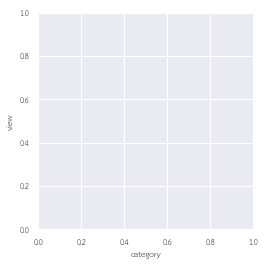

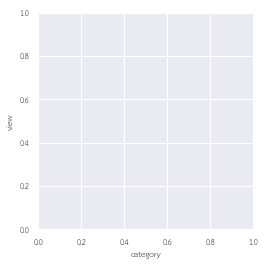

In [85]:
# plt.figure(figsize=(40,20))
fig , ax = plt.subplots(6,1,figsize=(20,40))
plt.xticks(rotation=45)
# sns.catplot( ax =ax[0],x="hour", y="view", data=input_nation )
sns.catplot( ax=ax[0], x="category", y="view",kind="box", data=input_nation)
sns.catplot( ax=ax[1], x="category", y="view",kind="box",data=input_nation[input_nation['view']<10000])
sns.catplot( ax=ax[2], x="category", y="view", kind="box",data=input_nation[input_nation['view']<5000])
sns.violinplot( ax=ax[3], x="category", y="view", data=input_nation)
sns.violinplot( ax=ax[4], x="category", y="view",data=input_nation[input_nation['view']<10000])
sns.violinplot( ax=ax[5], x="category", y="view",data=input_nation[input_nation['view']<5000])

In [87]:
input_nation.to_csv('notebook1-result-nation.csv')